<a href="https://colab.research.google.com/github/galvanic90/optimization/blob/main/maximos_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicaciones de la derivada máximos y mínimos 

## Clase 01

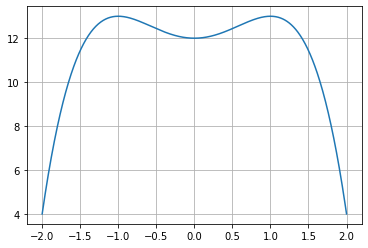

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  funct = 12 + 2*x**2 -x**4
  return funct


x = np.linspace(-2, 2, 1000)
y = f(x)
#y = list(map(lambda x: f(x), x))
plt.plot(x, y)
plt.grid(True)
plt.show()

## Class 02: Numerical methods to find polynomials roots

In [ ]:
# Here the libraries
import decimal as dec
import pandas as pd 
import seaborn as sns

In [ ]:

dec.getcontext().prec = 10

upper_val = 20
down_val = -10
x_upper = [upper_val]
x_down = [down_val]
x_mid = [0]
f_xup = [0]
f_xdown = [0]
f_xmid = [0]
f_product = [0]
error = [0]

table_bisection = {
  'x_upper': x_upper,
  'x_down' : x_down,
  'x_mid'  : x_mid, 
  'f_xup'  : f_xup,
  'f_xdown': f_xdown,
  'f_xmid' : f_xmid,
  'f_product': f_product,
  'error'  : error
}


def polynomy_1(x):
  val = 3*x**2 -120*x + 100
  return val

def mid_point(a,b):
  mid = (a + b)/2
  return mid

def error_aprox(x_0, x_1):
  error_apr = abs(x_0 - x_1)
  return  error_apr 

def error_conditional(x_0, x_1):
  error_param = 1e-8
  error_cond = error_aprox(x_0, x_1)
  
  if error_cond > error_param:
    return True
  else:
    return False

def bisection(x_0, x_1, x_upper, x_down, x_mid, f_xup, f_xdown, f_xmid, f_product, error):
  error_val = error_conditional(x_0, x_1)
  param = 0
  eval_f_x1 = 0
  eval_f_x0 = 0
  eval_f_mid = 0
  midd_point = 0
  while error_val == True: 
    error_val = error_aprox(x_0, x_1)  
    midd_point = mid_point(x_1, x_0)
    eval_f_x1 = polynomy_1(x_1)
    eval_f_x0 = polynomy_1(x_0)
    eval_f_mid = polynomy_1(midd_point)
    param = eval_f_x1 * eval_f_mid
    f_product.append(param)
    f_xup.append(eval_f_x1) 
    f_xmid.append(eval_f_mid)
    f_xdown.append(eval_f_x0)
    x_mid.append(midd_point)
    error.append(error_val)

    if param < 0:
      x_0 = midd_point
      x_down.append(x_0)
      x_upper.append(x_1)
      bisection(x_0, x_1, x_upper, x_down, x_mid, f_xup, f_xdown, f_xmid, f_product, error)
    elif param > 0:
      x_1 = midd_point
      x_down.append(x_0)
      x_upper.append(x_1)
      bisection(x_0, x_1, x_upper, x_down, x_mid, f_xup, f_xdown, f_xmid, f_product, error)
  return f_product, f_xup, f_xmid, f_xdown,  x_mid, x_down, x_upper, error     
    

bisection(down_val, upper_val, x_upper, x_down, x_mid, f_xup, f_xdown, f_xmid, f_product, error)
# print(len(x_upper), len(x_down), len(x_mid), len(f_xup), len(f_xdown), len(f_xmid), len(f_product), len(error))

bisection_data = pd.DataFrame(table_bisection)
bisection_data


,x_upper,x_down,x_mid,f_xup,f_xdown,f_xmid,f_product,error
0,20.000000,-10.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,5.000000,-10.000000,5.000000,-1100.000000,1.600000e+03,-4.250000e+02,4.675000e+05,3.000000e+01
2,5.000000,-2.500000,-2.500000,-425.000000,1.600000e+03,4.187500e+02,-1.779688e+05,1.500000e+01
3,1.250000,-2.500000,1.250000,-425.000000,4.187500e+02,-4.531250e+01,1.925781e+04,7.500000e+00
4,1.250000,-0.625000,-0.625000,-45.312500,4.187500e+02,1.761719e+02,-7.982788e+03,3.750000e+00
5,1.250000,0.312500,0.312500,-45.312500,1.761719e+02,6.279297e+01,-2.845306e+03,1.875000e+00
6,1.250000,0.781250,0.781250,-45.312500,6.279297e+01,8.081055e+00,-3.661728e+02,9.375000e-01
7,1.015625,0.781250,1.015625,-45.312500,8.081055e+00,-1.878052e+01,8.509922e+02,4.687500e-01
8,0.898438,0.781250,0.898438,-18.780518,8.081055e+00,-5.390930e+00,1.012445e+02,2.343750e-01
9,0.898438,0.839844,0.839844,-5.390930,8.081055e+00,1.334763e+00,-7.195612e+00,1.171875e-01


In [ ]:
root = polynomy_1(0.851458)
print(root, polynomy_1(0.8514579386))
bisection_data.dtypes
# [i for i in bisection_data.index]

-1.7822708002768195e-05 -1.076838510982725e-05


x_upper      float64
x_down       float64
x_mid        float64
f_xup        float64
f_xdown      float64
f_xmid       float64
f_product    float64
error        float64
dtype: object

### Graphics

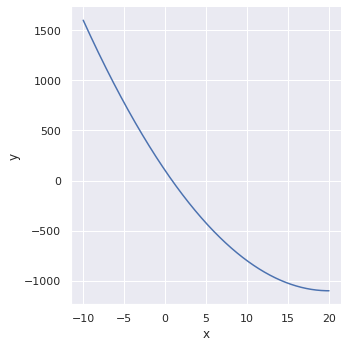

In [ ]:

x_b = np.linspace(-10, 20, 1000)
y_b = polynomy_1(x_b)
data = {'x':x_b, 'y':y_b}
data_graph = pd.DataFrame(data)
sns.set_theme()
sns.relplot(data=data_graph, kind="line", x="x", y="y")
plt.show()

# Clase 03: La Razón Dorada 

Cálulo del máximo local (o absoluto) de una función a partir de un algoritmo basado en la razón dorada 

In [ ]:
# def polynomy_2(x):
  